# Feature Engineering by rows
## Control

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir
root="./datasetControl";


# It is going to take a while to read all the data
linecounter= 0
filecounter=0
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                               'Median','IQR','0.025','0.25','0.5','0.75','0.975'])
cont=0;
for file in listdir("./datasetControl"):


        # Renaming the file
        
        filecounter= filecounter + 1
        
        file_root = root + "/" + file
        print(file_root)
        if(file!=".DS_Store"):
            read_file = open(file_root, 'r')
            read_file.readline()
            counterinside=0
            user = []
            alcoholic=[]
            paradigm=[]
            replication=[]
            channel=[]
           
            # For each line we separate the values to add them in the created dataframe
            for line in read_file:
                if(filecounter<=5):
                    linecounter= linecounter + 1
                
                firstline = line.split("  ")
                lineeg=[]

                for i in range(len(firstline)-1):
                    

                    if i==0:
                        user.append(float(firstline[i]))
                    elif i==1:
                        alcoholic.append(firstline[i])

                    elif i==2:

                        paradigm.append(firstline[i])

                    if i==3:

                        replication.append(float(firstline[i]))
                    elif i>=4:
                        if i==4:
                            channelline=firstline[i].split(" ")
                            channel.append(channelline[0])
                            if channelline[1][0]=='c':
                                canal=channelline[1][1:]
                                lineeg.append(float(canal))

                            else:
                                lineeg.append(float(channelline[1]))

                        else:
                            lineeg.append(float(firstline[i]))

              
                datachannel = pd.DataFrame(lineeg)
                min = datachannel.min()
                max = datachannel.max()
                sd = datachannel.std()
                mean = datachannel.mean()
                quantil0=datachannel.quantile(.025)
                quantil1=datachannel.quantile(.25)
                median=datachannel.quantile(.5)
                quantil3=datachannel.quantile(.75)
                quantil4=datachannel.quantile(.975)
                iqr=quantil3[0]-quantil1[0]
                # counterinside is the one which goes through the lines of the current file
                # cont is the counter which goes through all the files
                df.loc[cont]=[user[counterinside],alcoholic[counterinside],paradigm[counterinside],replication[counterinside],channel[counterinside],min[0],max[0],
                              sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
               
                cont= cont +1
                counterinside= counterinside + 1

./datasetControl/co2c0000337.txt
./datasetControl/co2c0000338.txt
./datasetControl/co2c0000339.txt
./datasetControl/co2c0000340.txt
./datasetControl/co2c0000341.txt
./datasetControl/co2c0000342.txt
./datasetControl/co2c0000344.txt
./datasetControl/co2c0000345.txt
./datasetControl/co2c0000346.txt
./datasetControl/co2c0000347.txt


## Separate target and features


In [11]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separar les variables explicatives
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)

[[-13.519       13.336        4.90131002 ...   2.106        5.035
   10.895     ]
 [-13.845       13.011        5.15774427 ...   1.78         5.686
   11.058     ]
 [-17.731       19.867        7.30092215 ...   0.0915       5.829
   14.496     ]
 ...
 [ -5.859       12.207        3.23385049 ...   2.93         5.859
    9.582625  ]
 [-30.141        6.48         8.27033243 ...  -9.145       -1.699
    4.832     ]
 [-37.842        4.639        8.52955733 ... -13.428       -7.93475
    2.197     ]]


## PCA

In [12]:

# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
principalDf.head(10)

,component 1,component 2
0,-1.376531,-0.581116
1,-1.372398,-0.492854
2,-0.675350,0.624572
3,-1.581496,1.462888
4,-0.779211,-1.068264
5,-1.477800,-0.670115
6,0.901350,-2.016055
7,-0.189471,-1.225408
8,0.154644,-1.189240
9,1.692714,0.999148


## Important explicative variables

In [13]:

pca.explained_variance_ratio_

array([0.57114149, 0.35312152])

### Relationship important data

In [14]:
df_1 = pd.DataFrame(x, columns=features)

# data normalitzada
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=3)
pca.fit_transform(data_scaled)

# components relacionats amb les variables explicatives
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3'])
# The columns we are gonna keep are pc-1: 0.25, pc-2:Sd 

,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.315002,-0.135588,0.088660,-0.390294,-0.387513,0.118600,-0.339917,-0.389096,-0.387513,-0.338530,-0.162048
PC-2,-0.252057,0.444151,0.489823,0.099024,0.049294,0.433661,-0.225134,-0.084669,0.049294,0.225834,0.433228
PC-3,0.319469,0.432627,0.115414,-0.058762,-0.249557,-0.431123,0.256200,-0.043634,-0.249557,-0.364316,0.428143


## Control graph

In [15]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

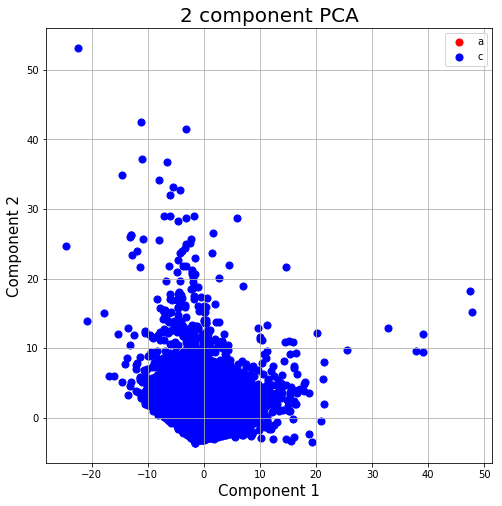

In [23]:

# Visualization of the alcoholic users
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Final Data

In [27]:
# It only has to be used once because of the unnecessary columns have been removed and we only take the three explicative variables 
# which are more relevant
resultDf= df.drop(df.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)
resultDf = pd.concat([resultDf, principalDf], axis=1)
resultDf


,user_id,alcoholic,paradigm,replication,Channel,component 1,component 2
0,337.0,c,S1obj,0.0,FP1,-1.376531,-0.581116
1,337.0,c,S1obj,0.0,FP2,-1.372398,-0.492854
2,337.0,c,S1obj,0.0,F7,-0.675350,0.624572
3,337.0,c,S1obj,0.0,F8,-1.581496,1.462888
4,337.0,c,S1obj,0.0,AF1,-0.779211,-1.068264
5,337.0,c,S1obj,0.0,AF2,-1.477800,-0.670115
6,337.0,c,S1obj,0.0,FZ,0.901350,-2.016055
7,337.0,c,S1obj,0.0,F4,-0.189471,-1.225408
8,337.0,c,S1obj,0.0,F3,0.154644,-1.189240
9,337.0,c,S1obj,0.0,FC6,1.692714,0.999148
